In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [156]:
df=pd.read_csv("DS2_C5_S6_KCHouse_Data_Practice.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [112]:
df.shape

(21613, 21)

In [113]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Task 1: Data Prepartion and sampling.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          21613 non-null  int32
 1   bedrooms       21613 non-null  int64
 2   bathrooms      21613 non-null  int32
 3   sqft_living    21613 non-null  int64
 4   sqft_lot       21613 non-null  int64
 5   floors         21613 non-null  int32
 6   waterfront     21613 non-null  int64
 7   view           21613 non-null  int64
 8   condition      21613 non-null  int64
 9   grade          21613 non-null  int64
 10  sqft_above     21613 non-null  int64
 11  sqft_basement  21613 non-null  int64
 12  yr_built       21613 non-null  int64
 13  yr_renovated   21613 non-null  int64
 14  zipcode        21613 non-null  int64
 15  lat            21613 non-null  int32
 16  long           21613 non-null  int32
 17  sqft_living15  21613 non-null  int64
 18  sqft_lot15     21613 non-null  int64
dtypes: i

In [115]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [117]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


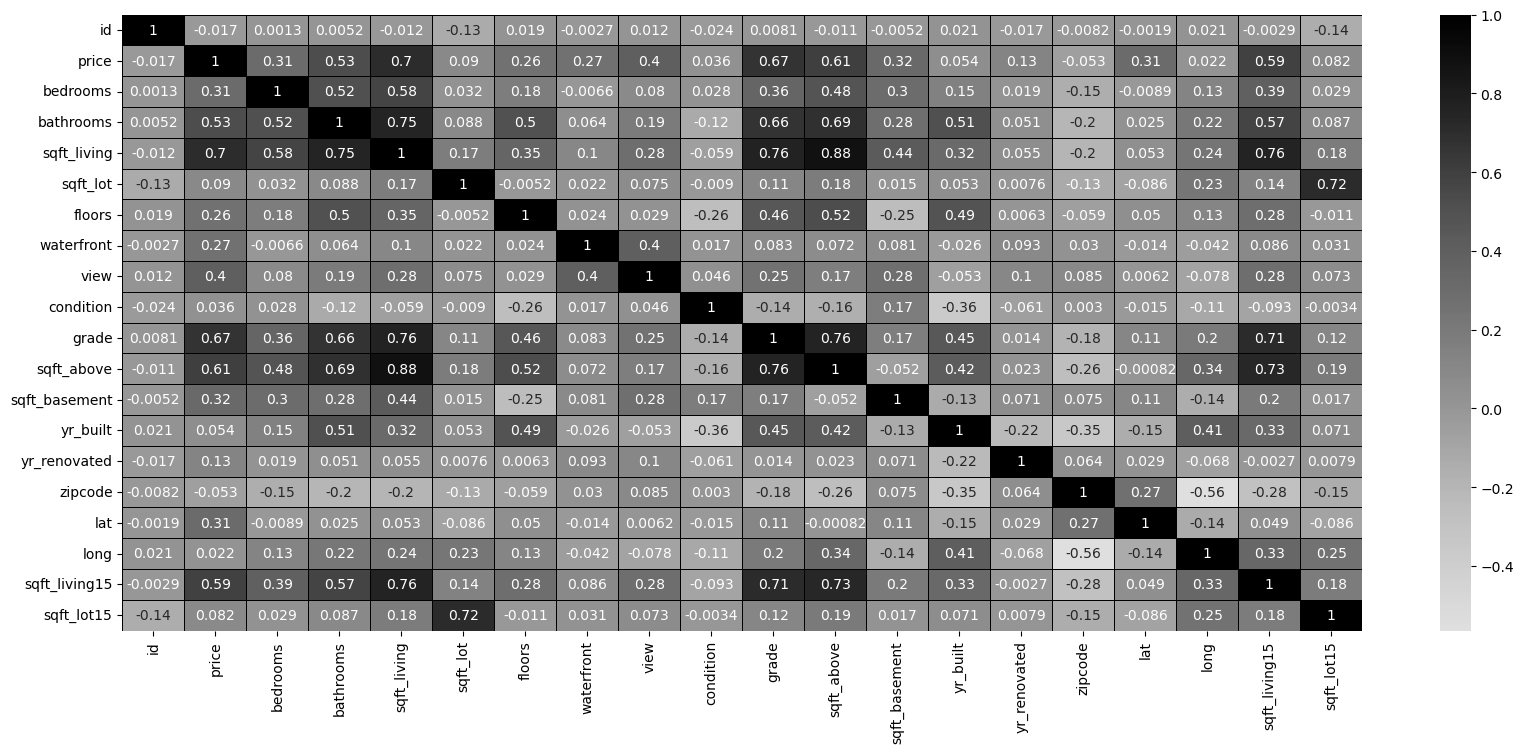

In [118]:
plt.figure(figsize=(20,8))
sb.heatmap(df.corr(),annot=True,linecolor='k',linewidths=.5,cmap='Greys',center=0);

# Data Visulizations.

In [159]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<10:
        cat.append(i)
    else:
        num.append(i)

In [160]:
cat

['floors', 'waterfront', 'view', 'condition']

In [161]:
num

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

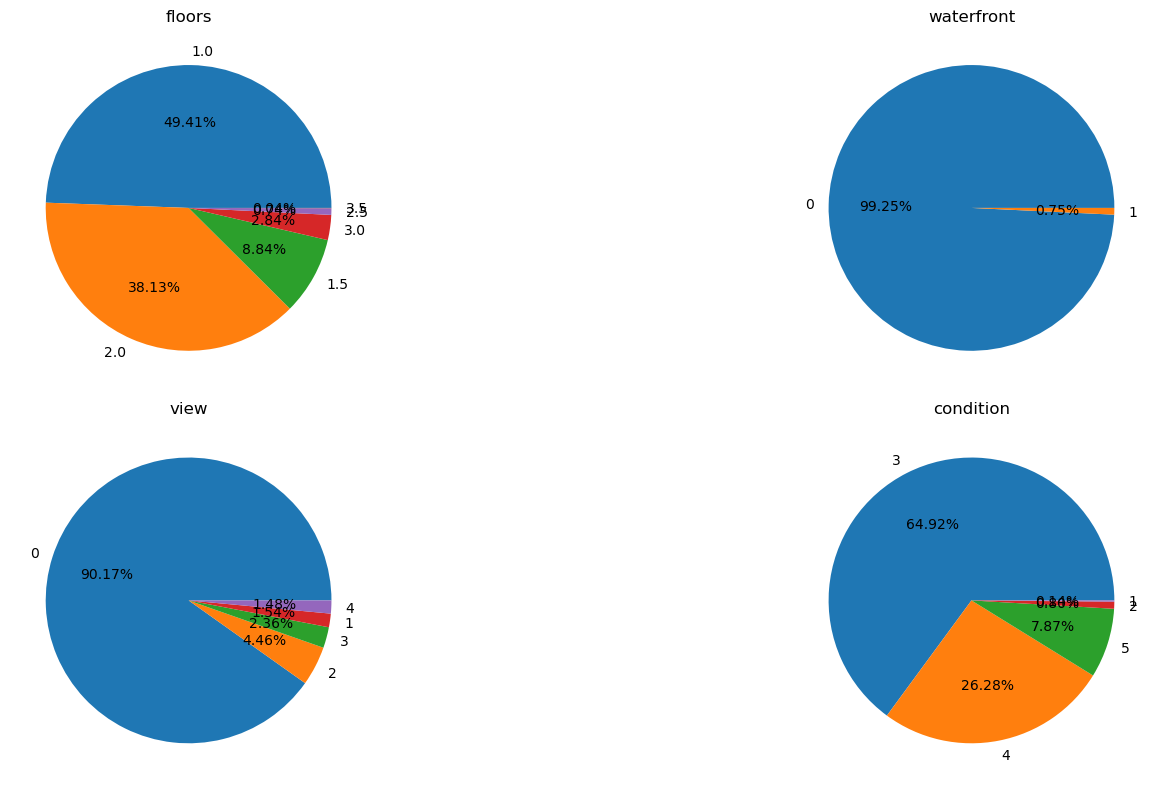

In [162]:
cat_cols=cat
num_col=2
num_rows=int(len(cat_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,8))
for col,ax in zip(cat_cols,axs.flatten()[:len(cat_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

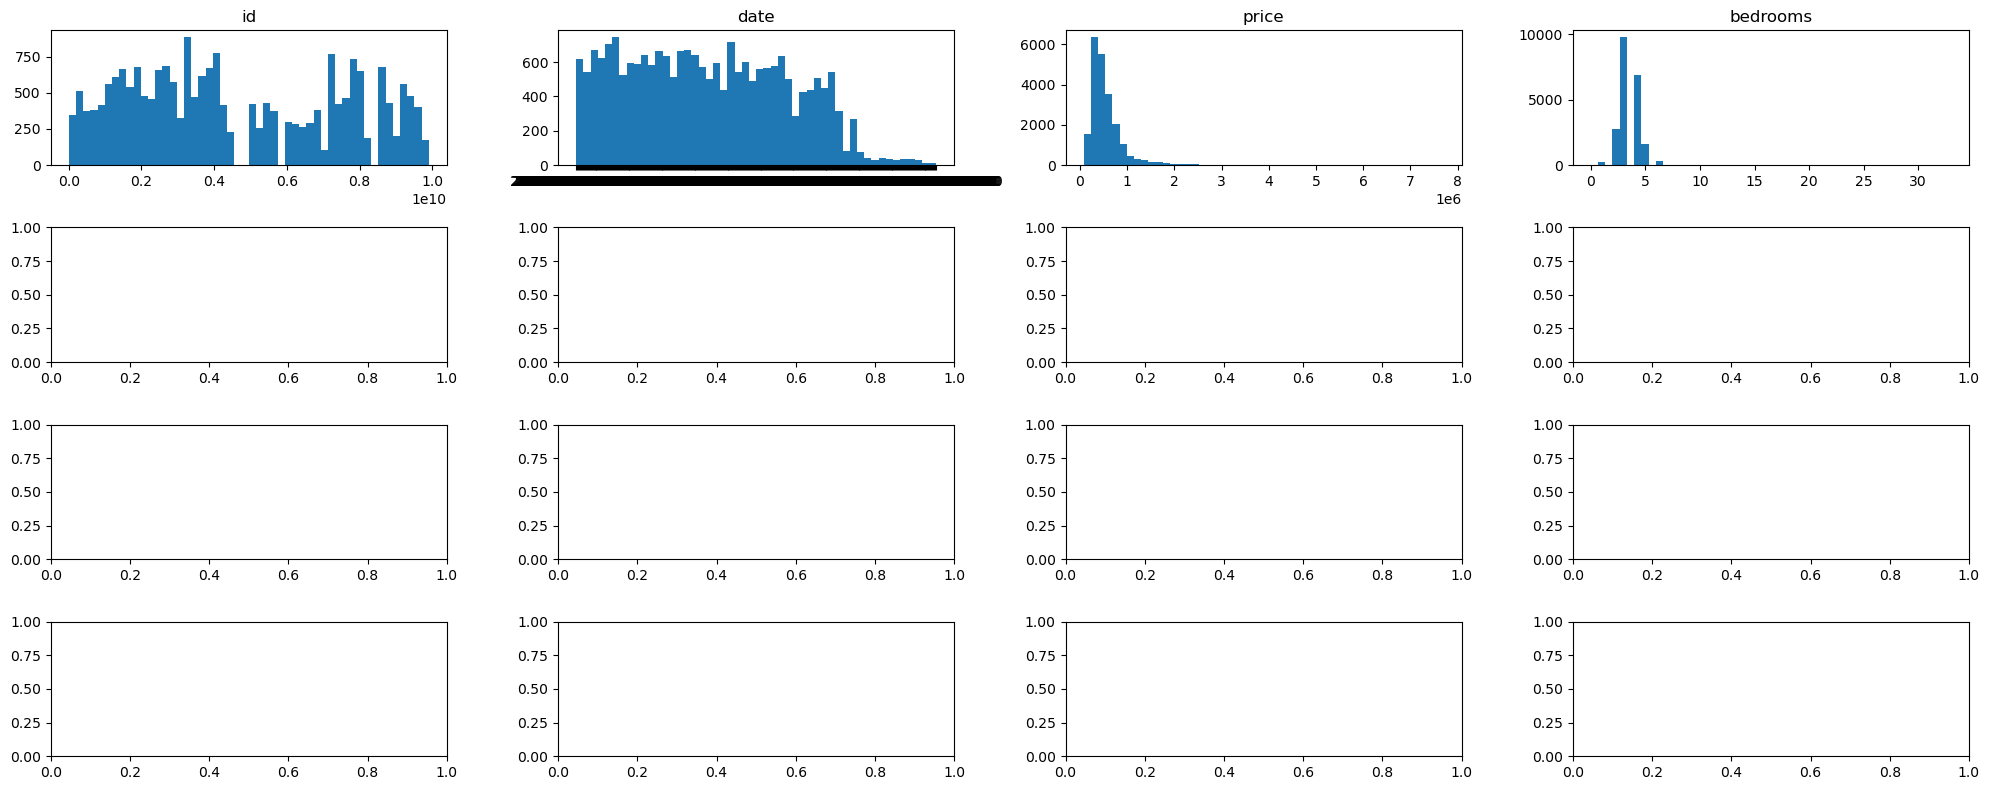

In [163]:
numeric_cols=num
num_col=4
bins=50
num_rows=int(len(numeric_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,8))
for col,ax in zip(numeric_cols,axs.flatten()[:len(cat_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)

In [164]:
df=df.drop(labels=['id','date'],axis=1)


In [165]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


# Splitting data.

In [166]:
x=df1.drop(columns='price',axis=1)
y=df1['price']

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=8)


# Task 2: Baseline: Linear Regression.

# Evaluate a simple Linear Regression model as baseline.

In [168]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)
model.score(x_train,y_train)

0.696763873899443

In [169]:
y_pred=model.predict(x_test)
y_pred

array([-0.22577502,  0.42336575, -1.07976611, ..., -1.05164112,
        0.17893385, -0.85401732])

# Accuracy for the testing data.

In [170]:
model.fit(x_test,y_test)
model.score(x_train,y_train)

0.6935958763556844

# Model Evaluation.

In [171]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

0.3062852048902703

In [172]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.33724375076570207

In [173]:
from sklearn.metrics import mean_absolute_error
RMSE=mean_squared_error(y_test,y_pred,squared=False)
RMSE

0.5534303975119819

In [174]:
print('R_square',model.score(x_train,y_train))
print('MSE',MSE)
print('MAE',MAE)
print('RMSE',RMSE)

R_square 0.6935958763556844
MSE 0.3062852048902703
MAE 0.33724375076570207
RMSE 0.5534303975119819


# Task 3: Bagging with Random Forest.

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,KFold
DT=RandomForestRegressor()
cv=KFold(n_splits=7)
score=cross_val_score(DT,x,y,scoring='neg_mean_squared_error',cv=cv)
print('mean.score',np.sqrt(-score).mean())

mean.score 0.35626764739039557


# Task 4: Evaluate the Best model and predict the test data.

# Evaluate the best model on the training and testing dataset.

In [196]:
model1=DT.fit(x_train,y_train)
model1.score(x_train,y_train)


0.9822571831264889

In [197]:
y_pred1=model1.predict(x_test)
y_pred1

array([-0.11624072,  0.17967659, -0.94069249, ..., -0.89622332,
        0.08863754, -0.91366541])

# Make a prediction on the test dataset.

In [198]:
model1=DT.fit(x_test,y_test)
model1.score(x_train,y_train)

0.846046569998097

# Model Evaluation.

In [199]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

0.3062852048902703

In [200]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.33724375076570207

In [201]:
from sklearn.metrics import mean_absolute_error
RMSE=mean_squared_error(y_test,y_pred,squared=False)
RMSE

0.5534303975119819

In [202]:
print('R_square',model.score(x_train,y_train))
print('MSE',MSE)
print('MAE',MAE)
print('RMSE',RMSE)

R_square 0.6935958763556844
MSE 0.3062852048902703
MAE 0.33724375076570207
RMSE 0.5534303975119819


# Plot original and prediction price values.

In [203]:
x_test.shape

(4323, 18)

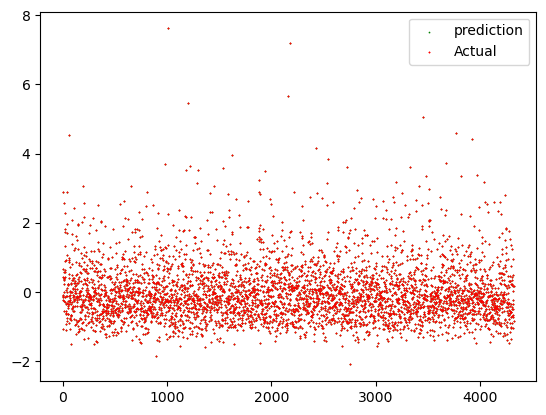

In [204]:
plt.scatter(x=range(4323),y=y_pred,color='Green',label='prediction',s=0.1,marker='^')
plt.scatter(x=range(4323),y=y_pred,color='Red',label='Actual',s=0.1,marker='*')
plt.legend();